In [4]:
# importing liabraries for analysis
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# setting pandas safe option
pd.set_option('mode.copy_on_write', True)

# Should Doctors be Prescribing Saunas?

#### This notebook contains analysis on two distinct data sets, one intervention, and the other cross-sectional in nature.

The first dataset is an anonymised copy of [Community Sauna Baths](https://www.community-sauna.co.uk/) Annual Survey in 2024. It contains 1,799 responses.

The second dataset was collected by the researcher during their research with Community Sauna Baths, and, contains 18 valid pre-sauna and post-sauna wellbeing scores using the Measure Yourself Concerns and Wellbeing (MYCaW) instrument.

# Step 1: Data Cleaning

We begin with the larger data set and explore what cleaning is required.

In [5]:
# Load the dataset from a CSV file
sauna_2025 = pd.read_csv("Anonymised Community Sauna Annual 2024 Survey (Responses).csv")
print("Shape: ",sauna_2025.shape)

Shape:  (1799, 35)


In [6]:
# checking for missing values
sauna_2025.isnull().sum()

Timestamp                                                                                                                                 0
What is your age group?                                                                                                                   1
What gender do you identify with?                                                                                                         6
How would you describe your ethnicity?                                                                                                    5
Do you consider yourself to have a disability or long term health condition?                                                             11
What is your sexual orientation?                                                                                                          4
Please indicate the following about your employment status:                                                                               3
What is your religio

In [8]:
# dropping columns for anonymity and irrelevance to analysis

drop_list = [
    "ID",
    "Timestamp", 
    "What is your name?", 
    "What is your sexual orientation?",
    'Are you satisfied with the temperature at our saunas?,"If you’re not satisfied, could you please explain why"',
    'Are you satisfied with the amount of customers during the sessions?,"If you’re not satisfied, could you please explain why2"',
    "How would you rate  the overall cleanliness and hygiene of the sauna facilities? On a scale of 1 to 5, where 1 is low and 5 is high",
    "How would you rate the staff’s friendliness and professionalism?  On a scale of 1 to 5, where 1 is low and 5 is high",
    "How would you rate the overall ambiance and atmosphere of the sauna? On a scale of 1 to 5, where 1 is low and 5 is high",
    "Are the sauna prices reasonable and in line with your expectations? On a scale of 1 to 5, where 1 is low and 5 is high",
    "What improvements or additions would you like to see in the sauna facilities or services?",
    "Do you know of any specific location where we could set up a community sauna? (e.g., a park, unused building, or local space)",
    "What improvements would you suggest for the facilities, services, or events?",
    "What topics would you like to hear more about from us in our communications? (Select all that apply)",
    "Is there anything else you would like to share or comment on regarding your experiences at the community sauna in London?"
]


sauna_2025 = sauna_2025.drop(columns=drop_list, errors="ignore")
df = sauna_2025.drop(columns=sauna_2025.columns[-1], errors="ignore")

In [9]:
# renaming columns for quick reference and standardisation
rename_map = {
    """What is your age group?""": "age",
    """What gender do you identify with?""": "gender",
    """How would you describe your ethnicity?""": "ethnicity",
    """Do you consider yourself to have a disability or long term health condition?""": "disability_health_condition",
    """Please indicate the following about your employment status:""": "employment_status",
    """What is your religious belief?""": "religious_belief",
    """How would you describe your sexual orientation?""": "sexual_orientation",
    """Where do you currently live?""": "location",
    """Had you been to a sauna before you came to Community Sauna?""": "previous_sauna_experience",
    """How did you hear about the Community Sauna?""": "sauna_discovery_channel",
    """How often do you visit our sauna?""": "visit_frequency",
    """Which of our sauna locations do you visit most often?""": "location_frequency",
    """Have you experienced any physical health improvements from using the sauna?""": "physical_health_improvements",
    """Have you experienced any mental health improvements from using the sauna?""": "mental_health_improvements",
    """How important is having regular access to sauna? On a scale of 1 to 5, where 1 is low and 5 is high""": "sauna_access_importance",
    """What do you enjoy most about the community sauna?""": "enjoyment_reasons",
    """Do you feel a sense of belonging or community when using the sauna?""": "belonging_rating",
    """Please share why community sauna is important to you?""": "importance_reason",
}



df = df.rename(columns=rename_map)

df

,age,gender,ethnicity,disability_health_condition,employment_status,religious_belief,location,previous_sauna_experience,sauna_discovery_channel,visit_frequency,...,sauna_access_importance,enjoyment_reasons,Are you satisfied with the temperature at our saunas?,"If you’re not satisfied, could you please explain why",Are you satisfied with the amount of customers during the sessions?,"If you’re not satisfied, could you please explain why2",belonging_rating,Are you familiar with our social prescribing offers and services?,"If yes, how did you hear about it?",importance_reason
0,25–34,Female,"White (e.g., British, Irish, other European ba...",Yes,Employed,Judaism,Central London,Once or twice,Word of mouth,Monthly,...,3.0,"Helped with physical pain management, Improved...",Yes,NaN,No,a bit too busy sometimes,3.0,Yes,Social Media,NaN
1,18–24,Male,"White (e.g., British, Irish, other European ba...",No,Employed,Atheism,South East London,Once or twice,Word of mouth,Rarely,...,3.0,"Improved mood, Improved sense of belonging to ...",Yes,NaN,Yes,NaN,4.0,Yes,Social Media,NaN
2,35–44,Male,"Asian or Asian British (e.g., Indian, Pakistan...",No,Employed,Agnosticism,South East London,I was already a regular sauna user,Word of mouth,Weekly,...,4.0,"Helped with physical pain management, Improved...",Sometimes,It can varies a lot session to session,Yes,NaN,4.0,No,NaN,NaN
3,25–34,Non-binary,"Mixed or multiple ethnic groups (e.g., White a...",No,Employed,Atheism,East London,Once or twice,Word of mouth,Rarely,...,4.0,"Improved mood, Assists me with my mental healt...",Yes,NaN,Yes,NaN,3.0,Yes,Social Media,NaN
4,45–54,Female,"White (e.g., British, Irish, other European ba...",No,Employed,Judaism,North West London,Once or twice,Word of mouth,Monthly,...,3.0,"Improved mood, Improved sense of belonging to ...",Yes,NaN,Yes,NaN,5.0,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,25–34,Female,"White (e.g., British, Irish, other European ba...",No,Employed,Spiritual but not Religious,East London,Once or twice,Word of mouth,Rarely,...,4.0,"Improved mood, Improved sense of belonging to ...",Yes,NaN,Yes,I think any more customers per session would b...,5.0,No,NaN,It is a great social activity to do as a group...
1795,25–34,Female,"White (e.g., British, Irish, other European ba...",No,Employed,Atheism,South West London,Once or twice,Friend took me,Rarely,...,3.0,"Improved my fitness performance, Improved mood",Yes,NaN,Yes,NaN,3.0,No,NaN,I felt great after the session and would like ...
1796,25–34,Female,"Mixed or multiple ethnic groups (e.g., White a...",No,Self employed,Agnosticism,West London,I was already a regular sauna user,Word of mouth,Rarely,...,5.0,"Improved mood, Assists me with my mental healt...",Yes,NaN,Yes,NaN,5.0,No,NaN,It feels like you’re distancing yourself from ...
1797,25–34,Female,"White (e.g., British, Irish, other European ba...",No,Employed,Atheism,East London,Once or twice,Word of mouth,Weekly,...,4.0,"Helped with physical pain management, Improved...",Yes,NaN,No,A little crowded at times,5.0,No,Social Media,"Improved mental health, makes me feel strong a..."


In [ ]:
# Looking for free text responses in categorical columns
#  that will need to be cleaned before analysis

df['employment_status'].value_counts()

employment_status
Employed                                                                                                                                                                                                                                     1217
Self employed                                                                                                                                                                                                                                 329
Student                                                                                                                                                                                                                                        80
Unemployed                                                                                                                                                                                                                                     78
Business owner

In [14]:
# Cleaning up free-text responses in the employment_status column for easier visualisation later on
rename_employment = {
    "Both employed and self-employed": "Employed",
    "Student and employed as well on a casual basis": "Student",
    "Homemaker": "Homemaker",
    "Employed and student": "Student",
    "In training": "Student",
    "Part time employee": "Employed",
    "Long term sick for 4 years": "Sick Leave",
    "Studying and self employed": "Student",
    "Employed on reduced hours & receiving benefits": "Employed",
    "Candidate for ordained ministry": "Other",
    "Mother at home": "Homemaker",
    "Btw I do not ‘prefer not to say’ for the sexuality question previously - but you dud not offer an other option, only very binary or broad options. Please include an ‘other’ option next time to allow people to state their sexuality :)": "Other",
    "Athlete": "Other",
    "Employed and self-employed": "Employed",
    "Multiple of the above": "Other",
    "Maternity leave": "Maternity Leave",
    "Student and part-time work": "Student",
    "Freelance": "Freelancer",
    "employed and also self employed": "Employed",
    "Part time employed": "Employed",
    "طالب لجوء": "Other",
    "Tattooing, serving, teaching—my week is organized chaos!": "Employed",
    "Moving into employment (next week!)": "Unemployed",
    "freelance": "Freelancer",
    "full time carer": "Carer",
    "Freelancer": "Freelancer",
    "And employed": "Employed"
}
# Replacing the free-text responses with rename_employment mapped values
df['employment_status'] = df['employment_status'].replace(rename_employment) 
# Checking the cleaned employment_status column
df['employment_status'].value_counts()




employment_status
Employed                                                     1222
Self employed                                                 329
Student                                                        82
Unemployed                                                     79
Business owner                                                 51
Retired                                                        12
Freelancer                                                      3
Maternity Leave                                                 2
Other                                                           2
Homemaker                                                       1
Carer                                                           1
Tattooing, serving, teaching—my week is organized chaos!        1
Multiple of the above                                           1
Athlete                                                         1
Sick Leave                                                

In [15]:
# Exploring the free text responses in the gender column
df['gender'].value_counts()

gender
Female                1165
Male                   561
Non-binary              53
Female, Non-binary       5
Male, Non-binary         3
prefer not to say        1
Male, Non-binary,        1
Male, -if pushed         1
Trans man                1
Gender spicy x           1
Transmasc, Trans         1
Name: count, dtype: int64

In [ ]:
# Defining gender renaming dictionary
rename_gender = {
    "Male": "Male",
    "Female": "Female",
    "Non-binary": "Non-binary",
    "prefer not to say": "Prefer not to say",
    "Male, Non-binary": "Non-binary",
    "Male, Non-binary, ": "Non-binary",
    "Female, Non-binary": "Non-binary",
    "Male, -if pushed": "Prefer not to say",
    "Trans man": "Transgender man",
    "Transmasc, Trans": "Transgender man",
    "Gender spicy x": "Other",
}

# Replacing the free-text responses
df['gender'] = df['gender'].replace(rename_gender)
# Checking the cleaned gender column
df['gender'].value_counts()


gender
Female               1165
Male                  561
Non-binary             62
Prefer not to say       2
Transgender man         2
Other                   1
Name: count, dtype: int64

In [17]:
# Exploring the ethnicity column for free text responses
df['ethnicity'].value_counts()

ethnicity
White (e.g., British, Irish, other European background)                                                                                                                                     1418
Mixed or multiple ethnic groups (e.g., White and Black Caribbean, White and Asian)                                                                                                           143
Asian or Asian British (e.g., Indian, Pakistani, Bangladeshi, Chinese)                                                                                                                        89
Other ethnic group (please specify): ______________                                                                                                                                           46
Black, Black British, African, or Caribbean                                                                                                                                                   41
Prefer not to say        

In [18]:
# Defining ethnicity dictionary to re-map the ethnicity column to reduce label complexity 
# these labels are from the ONS to enhance representation, but make clean analysis difficult

rename_ethnicity = {
    "White (e.g., British, Irish, other European background)": "White",
    "White (e.g., British, Irish, other European background), Other ethnic group (please specify): ______________": "White",
    "White (e.g., British, Irish, other European background), Prefer not to say": "White",
    "Mixed or multiple ethnic groups (e.g., White and Black Caribbean, White and Asian)": "Mixed or Multiple Ethnicities",
    "Mixed or multiple ethnic groups (e.g., White and Black Caribbean, White and Asian), White (e.g., British, Irish, other European background)": "Mixed or Multiple Ethnicities",
    "Asian or Asian British (e.g., Indian, Pakistani, Bangladeshi, Chinese)": "Asian or Asian British",
    "Asian or Asian British (e.g., Indian, Pakistani, Bangladeshi, Chinese), White (e.g., British, Irish, other European background)": "Asian or Asian British",
    "Asian or Asian British (e.g., Indian, Pakistani, Bangladeshi, Chinese), Other ethnic group (please specify): ______________": "Asian or Asian British",
    "Black, Black British, African, or Caribbean": "Black or Black British",
    "Black, Black British, African, or Caribbean, Mixed or multiple ethnic groups (e.g., White and Black Caribbean, White and Asian)": "Black or Black British",
    "Black, Black British, African, or Caribbean, Mixed or multiple ethnic groups (e.g., White and Black Caribbean, White and Asian), White (e.g., British, Irish, other European background)":"Mixed or Multiple Ethnicities",
    "Arab, White (e.g., British, Irish, other European background)": "Mixed or Multiple Ethnicities",
    "Other ethnic group (please specify): ______________": "Other ethnic group",
    "Prefer not to say": "Prefer not to say",
    "Other ethnic group (please specify): ______________, Prefer not to say": "Prefer not to say"


}


In [21]:
# Defining a function for the remapping to the ethnicity column

def remap_ethnicity(df, mapping):
    """
    Remap the 'ethnicity' column in the given DataFrame using the provided mapping dictionary.
    Returns the modified DataFrame.
    """
    df = df.copy()
    df['ethnicity'] = df['ethnicity'].replace(mapping)
    return df

# Apply the function and check the cleaned ethnicity column
df = remap_ethnicity(df, rename_ethnicity)
df['ethnicity'].value_counts()

ethnicity
White                            1427
Mixed or Multiple Ethnicities     149
Asian or Asian British             91
Other ethnic group                 46
Black or Black British             41
Prefer not to say                  33
Arab                                7
Name: count, dtype: int64

In [23]:
# Checking for any unique or unexpected responses in the age column

df['age'].value_counts()

age
25–34       1009
35–44        492
45–54        151
55–64         76
18–24         63
65+            6
Under 18       1
Name: count, dtype: int64

# Exploratory Data Analysis

Now the data is in a cleaned and standardised state, we can start to explore it for patterns and themes. We'll begin with some basic descriptive statistics, before moving onto visualisations. Hopefully this will reveal associations or relationships between variables that might influence well-being. 

## Sauna access, belonging, and community questions

The survey asked respondents to "rate on a scale of 1-5, where 1 represented 'low' and 5 represented 'high'": 
- *"How important is having regular access to sauna?"*
- *"Do you feel a sense of belonging or community when using the sauna?"*

In [68]:
# Generating basic descriptive statistics for the continuous variables in the DataFrame
desc = df.describe()
print(desc)

print("Mean belonging rating:", df['belonging_rating'].mean())
print("Mean sauna access importance rating:", df['sauna_access_importance'].mean())

       sauna_access_importance  belonging_rating  enjoyment_reasons_count
count              1794.000000       1787.000000              1799.000000
mean                  4.163322          3.777840                 3.513063
std                   0.941438          0.964894                 1.770077
min                   1.000000          1.000000                 0.000000
25%                   4.000000          3.000000                 2.000000
50%                   4.000000          4.000000                 3.000000
75%                   5.000000          5.000000                 5.000000
max                   5.000000          5.000000                11.000000
Mean belonging rating: 3.7778399552322326
Mean sauna access importance rating: 4.163322185061316


In [69]:
# Defining a function to wrap long label names in plots

import textwrap # for wrapping long text labels
def wrap_labels(labels, width=20): # function to wrap labels
    return [textwrap.fill(label, width=width) for label in labels] # wraps each label to the specified width


#### Community Sauna Bathers by Age

Let's explore what age groups UK sauna bathers are...

Respondents by Age Group (Count and %):
          Count  Percent
age                     
25–34      1009    56.12
35–44       492    27.36
45–54       151     8.40
55–64        76     4.23
18–24        63     3.50
65+           6     0.33
Under 18      1     0.06


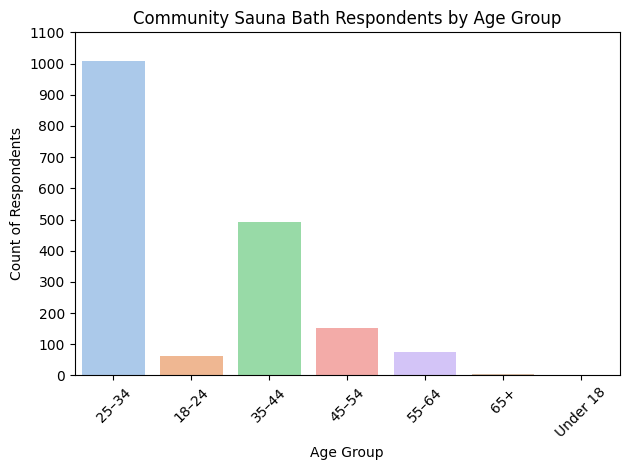

In [ ]:
# plotting a seaborn countplot of age groups
sns.countplot(df, x="age",hue="age", palette="pastel", legend=False) # seaborn countplot to visualize the count of respondents by age group
plt.title("Community Sauna Bath Respondents by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count of Respondents")
plt.yticks(
    ticks=np.arange(0, df['age'].value_counts().max() + 100, 100)
)
plt.xticks(rotation=45)
plt.tight_layout()

# Calculate counts and percentages for each age group
age_counts = df['age'].value_counts(dropna=True)
age_percent = (age_counts / age_counts.sum() * 100).round(2)
age_summary = pd.DataFrame({'Count': age_counts, 'Percent': age_percent})
# Show percentages
print("Respondents by Age Group (Count and %):")
print(age_summary)

### Ethnicity

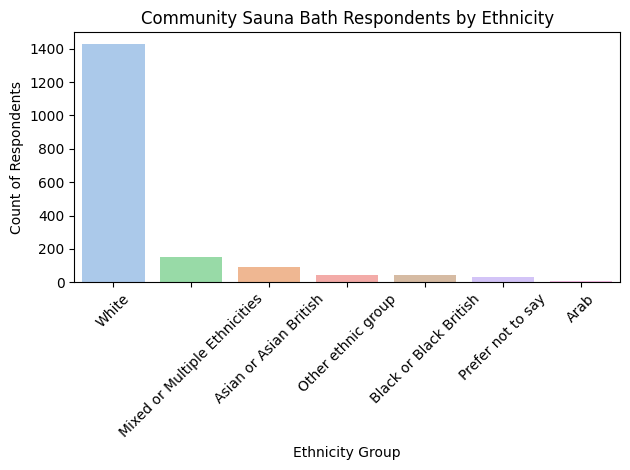

In [72]:
# count plot of ethnicity, ordered by most frequent response
sns.countplot(data=df, x="ethnicity", hue="ethnicity", palette='pastel', legend=False, order=df["ethnicity"].value_counts().index)
plt.title('Community Sauna Bath Respondents by Ethnicity')
plt.xlabel('Ethnicity Group')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()

In [71]:
# Calculate counts and percentages for each ethnicity group
ethnicity_counts = df['ethnicity'].value_counts(dropna=True)
ethnicity_percent = (ethnicity_counts / ethnicity_counts.sum() * 100).round(2)
ethnicity_summary = pd.DataFrame({'Count': ethnicity_counts, 'Percent': ethnicity_percent})

print("Respondents by Ethnicity Group (Count and %):")
print(ethnicity_summary)

Respondents by Ethnicity Group (Count and %):
                               Count  Percent
ethnicity                                    
White                           1427    79.54
Mixed or Multiple Ethnicities    149     8.31
Asian or Asian British            91     5.07
Other ethnic group                46     2.56
Black or Black British            41     2.29
Prefer not to say                 33     1.84
Arab                               7     0.39


### Disabilities or long term health conditions

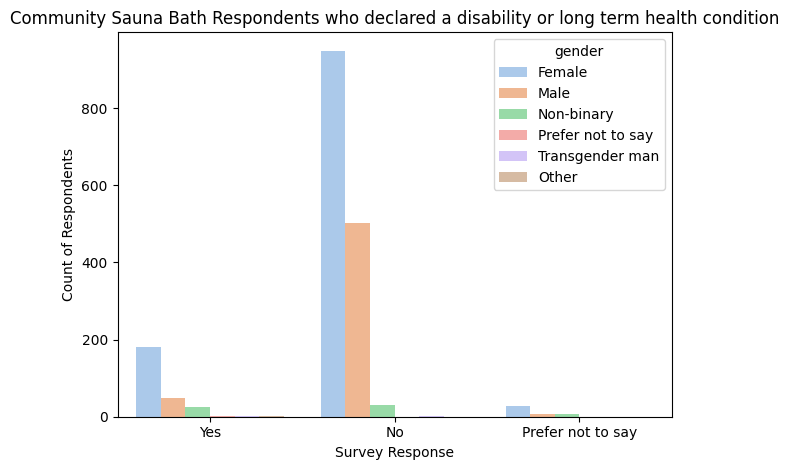

In [75]:
sns.countplot(data=df, x="disability_health_condition", hue="gender",palette='pastel') # seaborn count plot of disability/health condtion, hue set to gender to see the distribution
plt.title('Community Sauna Bath Respondents who declared a disability or long term health condition')
plt.xlabel('Survey Response')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()

In [73]:
# Calculate counts and percentages for health condition(s) and/or disabilities
disability_health_counts = df['disability_health_condition'].value_counts(dropna=True)
disability_health_percent = (disability_health_counts / disability_health_counts.sum() * 100).round(2)
disability_health_summary = pd.DataFrame({'Count': disability_health_counts, 'Percent': disability_health_percent})

print("Percentage of Respondents with a Disability or Health Condition Group (Count and %):")
print(disability_health_summary)

Percentage of Respondents with a Disability or Health Condition Group (Count and %):
                             Count  Percent
disability_health_condition                
No                            1487    83.17
Yes                            258    14.43
Prefer not to say               43     2.40


### Employment status

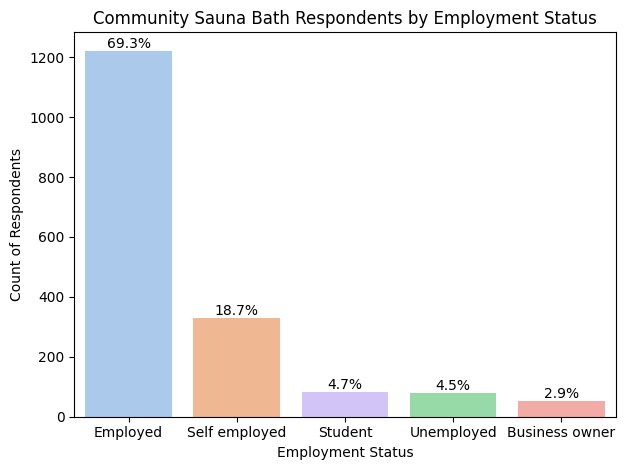

In [31]:
# visualing respondents by top 5 employment statuses by count
top5_status = df['employment_status'].value_counts().head(5).index
sns.countplot(
    data=df[df['employment_status'].isin(top5_status)],
    x="employment_status",
    hue="employment_status",
    palette='pastel',
    legend=False,
    order=top5_status
)
plt.title('Community Sauna Bath Respondents by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()

# Add percentage labels to each bar
total = df[df['employment_status'].isin(top5_status)].shape[0]
for p in plt.gca().patches:
    count = int(p.get_height())
    percent = 100 * count / total
    plt.gca().annotate(f'{percent:.1f}%', 
                       (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom', fontsize=10)

#### Now we have a picture of the demographics of individual bathers who responded to the survey and thus an idea of who this data is representative of, and most importantly, who it is not representative of. 

## Motivations for use

Using the `enjoyment_reasons` column, which were pre defined categories for responders to multi-select from, what are the top reasons Community Sauna Bath users enjoy the sauna?

In [85]:
# Using the explode method to extrapolate and count the combinations in the 'enjoyment reasons' column
exploded_counts = df['enjoyment_reasons'].explode().value_counts()
exploded_counts

enjoyment_reasons
Improved mood                                                                                                                                                              1637
Assists me with my mental health resilience                                                                                                                                 914
Improved sense of belonging to the local community.                                                                                                                         811
Helped me connect with the outdoors                                                                                                                                         807
Improved my health                                                                                                                                                          632
                                                                                                      

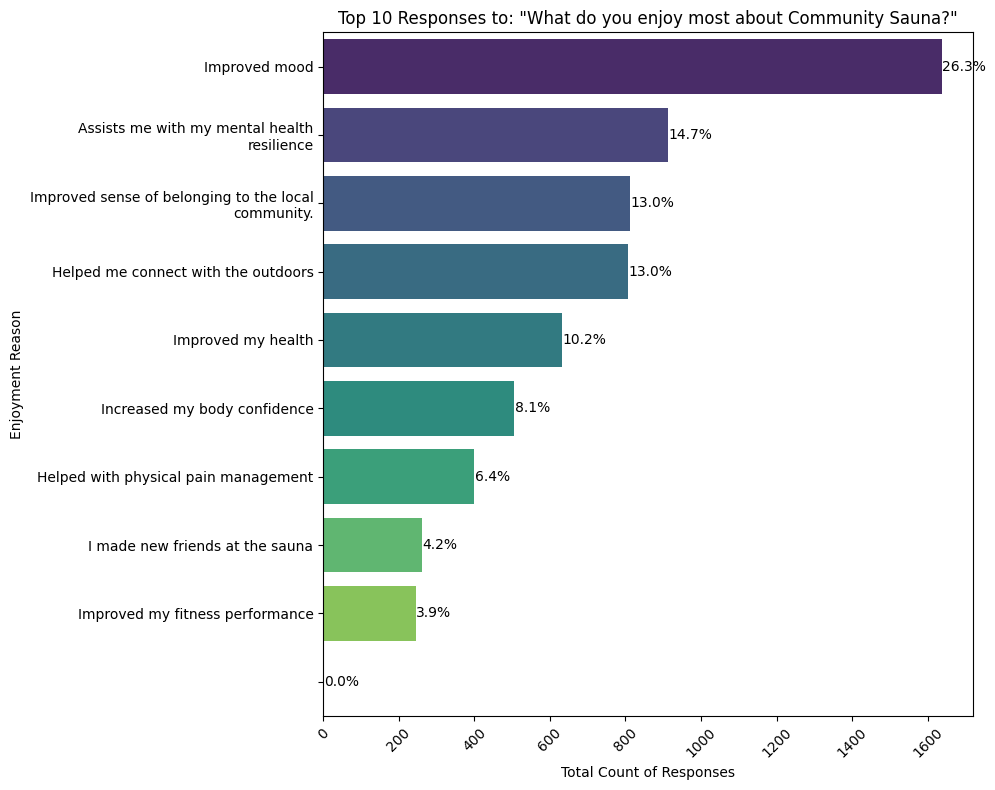

In [86]:
# Visualising the top 10 reasons for enjoying the community sauna, change "n" to adjust the number of reasons displayed

# Prepare data for seaborn
top_n = 10 # Define the number of top reasons to display
top_reasons = df['enjoyment_reasons'].explode().value_counts().head(top_n) # Get the top N reasons from the exploded counts
plot_data = top_reasons.reset_index() 
plot_data.columns = ['Enjoyment Reason', 'Count'] 
plot_data['Enjoyment Reason'] = plot_data['Enjoyment Reason'] 

# Create horizontal barplot
plt.figure(figsize=(10, 8)) # Set figure size
sns.barplot(data=plot_data, y='Enjoyment Reason', x='Count', hue='Enjoyment Reason', palette='viridis', legend=False) # Create a horizontal bar plot using seaborn
plt.title(f'Top {top_n} Responses to: "What do you enjoy most about Community Sauna?"') # Set the title of the plot
plt.xlabel('Total Count of Responses') # Set the x-axis label
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.yticks(rotation=0) 
plt.ylabel('Enjoyment Reason') # Set the y-axis label
plt.yticks(
    ticks=plt.gca().get_yticks(),
    labels=wrap_labels(plot_data['Enjoyment Reason'], width=40)
)
# Add percentage labels to each bar
total_responses = plot_data['Count'].sum()
for i, (count, reason) in enumerate(zip(plot_data['Count'], plot_data['Enjoyment Reason'])):
    percent = 100 * count / total_responses
    plt.text(count + 1, i, f"{percent:.1f}%", va='center', fontsize=10)
plt.tight_layout()
plt.show()

### Top 3 reasons by count:
1. Improved mood : a strong indicator that `mental_health_improvements` are worth investigating
2. Assists me with my mental health resilience: strong indicator to do some digging on `mental_health_improvements`
3. Improved sense of belonging to the local community: indicator to do some digging on `belonging_rating`

### Sauna habits and preferences
Let's have a look at how often these respondees sauna, which saunas locations they prefer, and how this differs (or not) by:
- Age
- Gender
- Employment Status


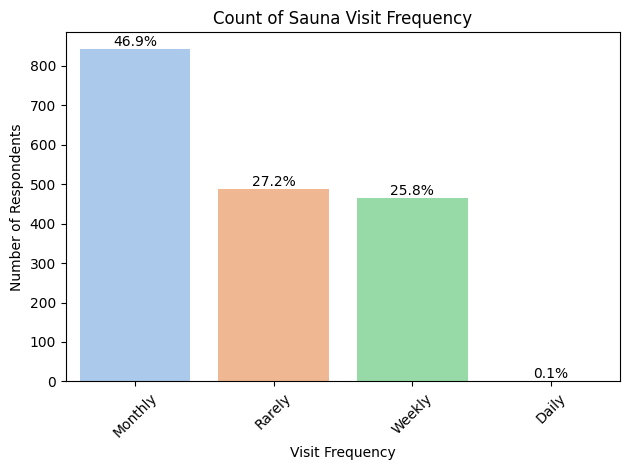

In [87]:
# Plotting the count of each visit frequency
sns.countplot(data=df, x="visit_frequency", order=df["visit_frequency"].value_counts().index, hue='visit_frequency', palette="pastel", legend=False)
plt.title("Count of Sauna Visit Frequency")
plt.xlabel("Visit Frequency")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
# Add percentage labels to each bar
total = df['visit_frequency'].value_counts().sum()
for p in plt.gca().patches:
    count = int(p.get_height())
    percent = 100 * count / total
    plt.gca().annotate(f'{percent:.1f}%', 
                       (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom', fontsize=10)
plt.tight_layout()

In [103]:
print("Number of responses to how often do you sauna?:", len(df['visit_frequency']))

Number of responses to how often do you sauna?: 1799


So of our 1,799 respondents:
- Almost half (46.9%) visit 'Monthly'
- Over a quarter (27.2%) visit 'Rarely'
- A quarter (25.8%) visit 'Weekly'
- And 0.1% (1 bather) reported visiting 'Daily'

In [ ]:
# Preparation of a cross-tabulation so we can later explore visit frequency of respondents by age group

df_frequency = pd.crosstab(df['visit_frequency'], df['age']) # Create a cross-tabulation of visit frequency by age group
df_frequency = df_frequency.reset_index() # Reset the index to convert the crosstab into a DataFrame
df_frequency.head() 

age,visit_frequency,18–24,25–34,35–44,45–54,55–64,65+,Under 18
0,Daily,0,0,1,0,0,0,0
1,Monthly,26,506,214,61,31,2,1
2,Rarely,18,260,126,53,28,3,0
3,Weekly,18,241,150,37,17,1,0


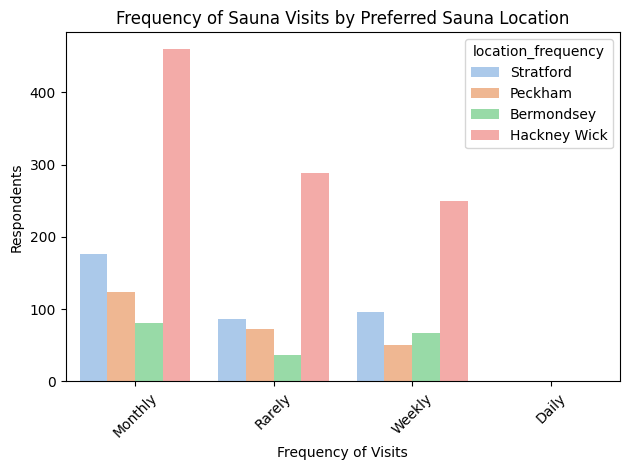

In [97]:
# Frequency of sauna visits by preferred sauna location
sns.countplot(data=df, x="visit_frequency", hue="location_frequency", palette='pastel', order=df["visit_frequency"].value_counts().index)
plt.title('Frequency of Sauna Visits by Preferred Sauna Location')
plt.xlabel('Frequency of Visits')
plt.ylabel('Respondents')
plt.xticks(rotation=45)
# Optional percentages labels, to add, remove the hash
# total = df['visit_frequency'].value_counts().sum()
# for p in plt.gca().patches:
#     count = int(p.get_height())
#     percent = 100 * count / total
#     plt.gca().annotate(f'{percent:.1f}%', 
#                        (p.get_x() + p.get_width() / 2, p.get_height()), 
#                        ha='center', va='bottom', fontsize=8)
plt.tight_layout()

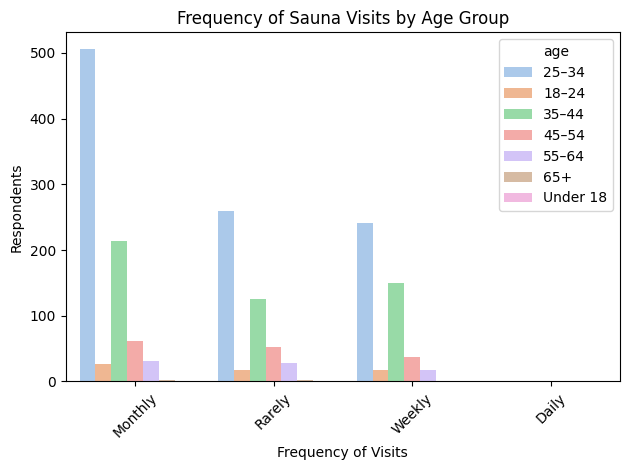

In [ ]:
# Frequency of sauna visits by Age Group
sns.countplot(data=df, x="visit_frequency", hue="age", palette='pastel', order=df["visit_frequency"].value_counts().index)
plt.title('Frequency of Sauna Visits by Age Group')
plt.xlabel('Frequency of Visits')
plt.ylabel('Respondents')
plt.xticks(rotation=45)
# Add optional percentage labels
# total = df['visit_frequency'].value_counts().sum()
# for p in plt.gca().patches:
#     count = int(p.get_height())
#     percent = 100 * count / total
#     plt.gca().annotate(f'{percent:.1f}%', 
#                        (p.get_x() + p.get_width() / 2, p.get_height()), 
#                        ha='center', va='bottom', fontsize=8)
plt.tight_layout()

### The 25-34 age group are top with.. visits. This aligns to recent grey literature on sauna as the new 4th space/pub.

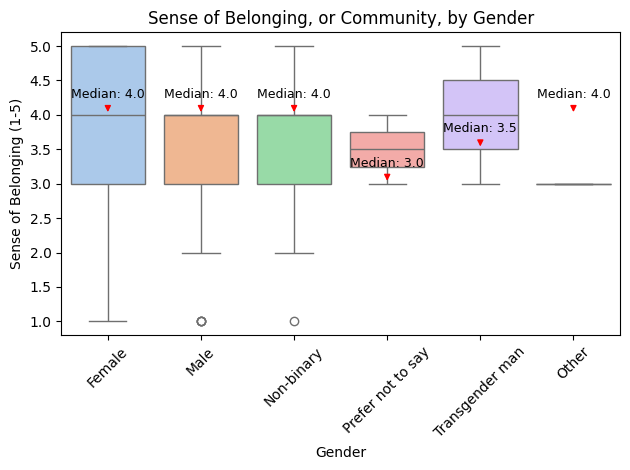

In [118]:
# A boxplot for visualizing the distribution of belonging_rating by gender.
sns.boxplot(data=df, x='gender', y='belonging_rating', palette='pastel')
plt.title('Sense of Belonging, or Community, by Gender')
plt.xlabel('Gender')
plt.ylabel('Sense of Belonging (1-5)')
plt.xticks(rotation=45)
# Annotate the median line for each gender (optional)
medians = df.groupby('gender')['belonging_rating'].median()
ax = plt.gca()
for i, gender in enumerate(medians.index):
    median_val = medians[gender]
    ax.annotate(f"Median: {median_val:.1f}", 
                xy=(i, median_val), 
                xytext=(0, 10), 
                textcoords='offset points',
                ha='center', va='bottom', fontsize=9, color='black',
                fontweight='normal',
                arrowprops=dict(arrowstyle='-|>', color='red', lw=1))
plt.tight_layout()

### Interpretation: Sense of Beloning and/or Community by Gender

- Those who identify as Female have the largest spread of ratings to this question, split 50/50 between 3-4 and 4-5. An outlier at 1 is pulling down the mean.
- Male and non-binary responses are tightly clustered around 3-4. The median is...
- Respondents who preferred not to share their gender were 50/50 between 3.0 - 3.5 and 3.5 - 4.0.
- Transgender men had a median rating of 4, with the majority of responses clustered between 3.5 - 4.5

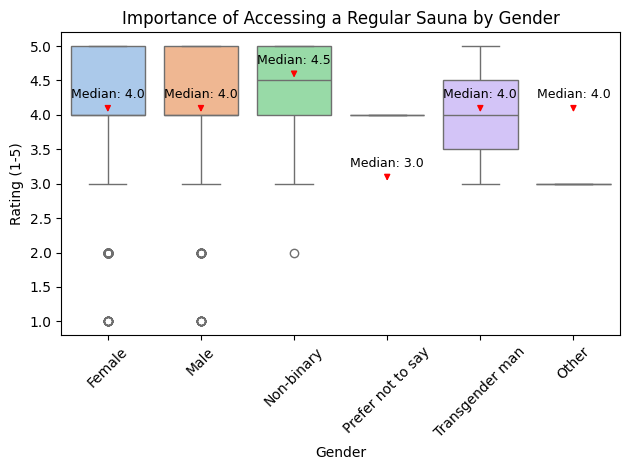

In [ ]:
# A boxplot for visualising the distribution of importance of accessing a regular sauna by gender.
sns.boxplot(data=df, x='gender', y='sauna_access_importance', palette='pastel')
plt.title('Importance of Accessing a Regular Sauna by Gender')
plt.xlabel('Gender')
plt.ylabel('Rating (1-5)')
plt.xticks(rotation=45)
plt.tight_layout()
# Annotate the median line for each gender (optional)
medians = df.groupby('gender')['sauna_access_importance'].median()
ax = plt.gca()
for i, gender in enumerate(medians.index):
    median_val = medians[gender]
    ax.annotate(f"Median: {median_val:.1f}", 
                xy=(i, median_val), 
                xytext=(0, 10), 
                textcoords='offset points',
                ha='center', va='bottom', fontsize=9, color='black',
                fontweight='normal',
                arrowprops=dict(arrowstyle='-|>', color='red', lw=1))

Add interpretation 

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

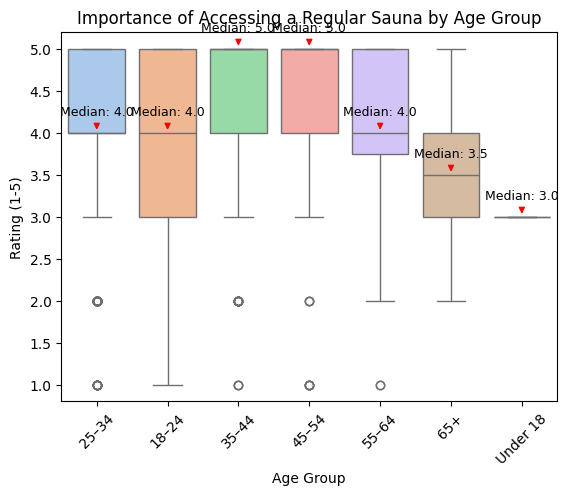

In [119]:
# A boxplot for visualising the distribution of importance of accessing a regular sauna by age group.
sns.boxplot(data=df, x='age', y='sauna_access_importance', palette='pastel')
plt.title('Importance of Accessing a Regular Sauna by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Rating (1-5)')
plt.xticks(rotation=45)
# Annotate the median line for each age group (optional)
medians = df.groupby('age')['sauna_access_importance'].median()
ax = plt.gca()
for i, gender in enumerate(medians.index):
    median_val = medians[gender]
    ax.annotate(f"Median: {median_val:.1f}", 
                xy=(i, median_val), 
                xytext=(0, 10), 
                textcoords='offset points',
                ha='center', va='bottom', fontsize=9, color='black',
                fontweight='normal',
                arrowprops=dict(arrowstyle='-|>', color='red', lw=1))
plt.tight_layout

Add interpretation

## Preparing data for statistical analysis

Before we can model multiple regression to assess the relationship between:
1.`visit_frequency` (IV) and `physical_health_improvements`(DV)
2. `visit_frequency`(IV ) and `mental_health_improvements` (DV)

We need to prepare the data by crosstabulating the respondees selection to the questions: "how often do you visit the sauna" and "have you seen any improvements in your physical/mental (separate questions) health?

In theory, every response in this data set should have a '1' in either Daily, Weekly, Monthly, and Rarely, along with a 'Yes', Not Sure', or 'No' in response to the questions.

In [ ]:
# importing the one hot encoder from sklearn
from sklearn.preprocessing import OneHotEncoder

# creating encoder object 
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Selecting the columns for one-hot encoding
df_subset = df[["visit_frequency", "physical_health_improvements", "mental_health_improvements"]]
# remove rows where visit_frequency is NaN
df_subset = df_subset.dropna(subset=["visit_frequency"])

# Converting 'visit_frequency' to categorical type for one-hot encoding
df_pandas_encoded = pd.get_dummies(df_subset, columns=["visit_frequency"])
# One-hot encoding the 'visit_frequency' column
onehotenc = encoder.fit_transform(df_subset[['visit_frequency']])
one_hot_df = pd.DataFrame(onehotenc, columns=encoder.get_feature_names_out(['visit_frequency']))
# add the other columns using join 
df_subset = df_subset.join(one_hot_df)
df_subset = df_subset.drop(columns=["visit_frequency"])
# for data integrity, add a new column 'visit_frequency_sum' to make sure each row sums to 1 indicating each respondee selected only one visit frequency
visit_frequency_columns = [col for col in df_subset.columns if col.startswith('visit_frequency_')] # Identify visit frequency column
visit_frequency_sum = df_subset[visit_frequency_columns].sum(axis=1) # Sum the visit frequency columns across rows
df_subset['visit_frequency_sum'] = visit_frequency_sum # Add the sum as a new column to the DataFrame df_subset
# show a preview of the dataframe
df_subset.head()

,physical_health_improvements,mental_health_improvements,visit_frequency_Daily,visit_frequency_Monthly,visit_frequency_Rarely,visit_frequency_Weekly,visit_frequency_sum
0,Yes,Yes,0.0,1.0,0.0,0.0,1.0
1,Not sure,Not sure,0.0,0.0,1.0,0.0,1.0
2,Not sure,Not sure,0.0,0.0,0.0,1.0,1.0
3,Yes,Yes,0.0,0.0,1.0,0.0,1.0
4,Yes,Yes,0.0,1.0,0.0,0.0,1.0


### Statistical testing

Since we have a categorical (interval) DV: `visit_frequency`and a categorical IV: `physical_health_improvements` or `mental_health_improvements`, we can't run logistic or binomial regression.

Instead, we'll use the Chi-square of independence to understand the assocation between these variables.

In [124]:
# Create a contingency table of sauna visit frequency counts in df_subset 
contingency_table = df_subset[[col for col in df_subset.columns if col.startswith('visit_frequency_')]].sum().to_frame(name='count')
contingency_table.index = contingency_table.index.str.replace('visit_frequency_', '')
contingency_table

,count
Daily,1.0
Monthly,841.0
Rarely,487.0
Weekly,462.0
sum,1791.0


In [128]:
from scipy.stats import chi2_contingency

# Performing Chi-square test of independence
# between frequency of sauna visits and physical health improvements
contingency_physical = pd.crosstab(
    df['visit_frequency'],
    df['physical_health_improvements']
)

chi2, p, dof, expected = chi2_contingency(contingency_physical)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)



Chi-square statistic: 45.23648636310094
Degrees of freedom: 6
P-value: 4.2001503593526665e-08


In [127]:
# Display observed frequencies 
print("Observed frequencies (physical health improvements by visit frequency):")
print(contingency_physical)

# Display expected frequencies from the chi-square test
print("\nExpected frequencies (from chi-square test):")
expected_df = pd.DataFrame(expected, 
                           index=contingency_physical.index, 
                           columns=contingency_physical.columns)
print(expected_df)

Observed frequencies (physical health improvements by visit frequency):
physical_health_improvements  No  Not sure  Yes
visit_frequency                                
Daily                          0         0    1
Monthly                       97       272  470
Rarely                        68       170  249
Weekly                        26       110  327

Expected frequencies (from chi-square test):
physical_health_improvements         No    Not sure         Yes
visit_frequency                                                
Daily                          0.106704    0.308380    0.584916
Monthly                       89.524581  258.730726  490.744693
Rarely                        51.964804  150.181006  284.854190
Weekly                        49.403911  142.779888  270.816201


In [129]:
# Convert expected values into a DataFrame for readability)
expected_df = pd.DataFrame(expected, 
                           index=contingency_physical.index, 
                           columns=contingency_physical.columns)

# Get observed values
observed = contingency_physical.values

# Calculate standardised residuals
residuals_physical = (observed - expected) / np.sqrt(expected)

# Turn residuals into a readable DataFrame
residuals_physical_df = pd.DataFrame(residuals_physical, 
                            index=contingency_physical.index, 
                            columns=contingency_physical.columns)

# Display the residuals
residuals_physical_df



physical_health_improvements,No,Not sure,Yes
visit_frequency,,,
Daily,-0.326656,-0.555320,0.542736
Monthly,0.790068,0.824941,-0.936438
Rarely,2.224434,1.617239,-2.124362
Weekly,-3.329720,-2.743304,3.414081


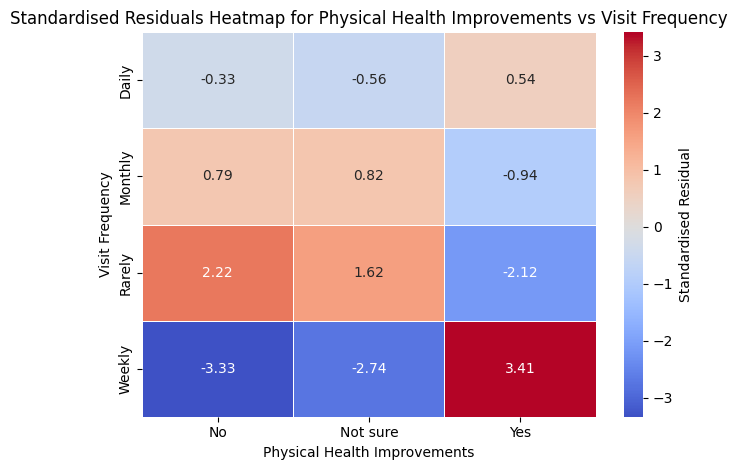

In [130]:
# Visualise residuals from the Chi-square test of independence on physical health improvements and visit frequency
# plt.figure(figsize=(10, 6))  # Optional
sns.heatmap(residuals_physical_df, 
            annot=True,        # Show values in cells
            cmap='coolwarm',   # Color scale: blue to red
            center=0,          # Center color at 0 (neutral)
            fmt=".2f",         # Format floats to 2 decimal places
            linewidths=0.5,    # Line between cells
            cbar_kws={'label': 'Standardised Residual'})  # Color bar label

# Add titles and labels
plt.title('Standardised Residuals Heatmap for Physical Health Improvements vs Visit Frequency')
plt.xlabel('Physical Health Improvements')
plt.ylabel('Visit Frequency')

plt.tight_layout()  # Adjust layout to fit
plt.show()


In [131]:
# Performing Chi-square test of independence between frequency of sauna visits and mental health improvements
contingency_mental = pd.crosstab(
    df['visit_frequency'],
    df['mental_health_improvements']
)

chi2, p, dof, expected = chi2_contingency(contingency_mental)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)


Chi-square statistic: 71.92858875832697
Degrees of freedom: 6
P-value: 1.6434556249618334e-13


In [132]:
# Displaying the observed frequencies of mental health improvements by visit frequency
contingency_mental

mental_health_improvements,No,Not sure,Yes
visit_frequency,,,
Daily,0,0,1
Monthly,19,80,740
Rarely,31,96,360
Weekly,12,27,425


In [133]:
# Convert expected values into a DataFrame (optional, for readability)
expected_df = pd.DataFrame(expected, 
                           index=contingency_mental.index, 
                           columns=contingency_mental.columns)

# Get observed values
observed = contingency_mental.values

# Calculate standardised residuals
residuals_mental = (observed - expected) / np.sqrt(expected)

# Turn residuals into a readable DataFrame
residuals_mental_df = pd.DataFrame(residuals_mental, 
                            index=contingency_mental.index, 
                            columns=contingency_mental.columns)

# Display the residuals
residuals_mental_df
print(residuals_mental_df)


mental_health_improvements        No  Not sure       Yes
visit_frequency                                         
Daily                      -0.186058 -0.336667  0.160295
Monthly                    -1.863727 -1.548038  0.940280
Rarely                      3.444099  5.491722 -2.697208
Weekly                     -1.013655 -3.528925  1.491422


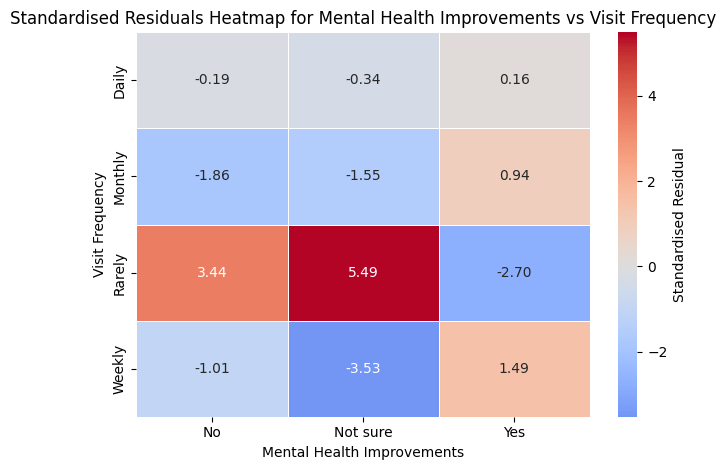

In [134]:
# Visualise residuals from the Chi-square test of independence on mental health improvements and visit frequency
# plt.figure(figsize=(10, 6))  # Optional: might remove
sns.heatmap(residuals_mental_df, 
            annot=True,        # Show values in cells
            cmap='coolwarm',   # Color scale: blue to red
            center=0,          # Center color at 0 (neutral)
            fmt=".2f",         # Format floats to 2 decimal places
            linewidths=0.5,    # Line between cells
            cbar_kws={'label': 'Standardised Residual'})  # Color bar label

# Add titles and labels
plt.title('Standardised Residuals Heatmap for Mental Health Improvements vs Visit Frequency')
plt.xlabel('Mental Health Improvements')
plt.ylabel('Visit Frequency')

plt.tight_layout()  # Adjust layout to fit
plt.show()


## Intervention study data analysis

The instrument of measure used in the resesearch is inversely coded where wellbeing ratings are on the scale of:

- 0 = "as good as it can be" and 
- 6 = "as bad as it can be"

In [140]:
# Load the intervention study dataset
df_intervention = pd.read_csv("Embedded Intervention Study Before and After(Wellbeing scores)(final).csv")
# Clean column names (remove extra spaces)
df_intervention.columns = df_intervention.columns.str.strip()
# Drop rows where 'Before wellbeing score' is NaN
df_intervention = df_intervention.dropna(subset=['Before wellbeing score'])
# Drop rows where 'After wellbeing score' is NaN
df_intervention = df_intervention.dropna(subset=['After wellbeing score'])
# Drop Before comments and After comments since this is qualitative data we don't need
df_intervention = df_intervention.drop(['Before comments'], axis=1, errors='ignore')
df_intervention = df_intervention.drop(['After comments'], axis=1, errors='ignore')
# Round the wellbeing scores to whole numbers because half numbers are not accepted as valid by this instrument
df_intervention['Before wellbeing score'] = df_intervention['Before wellbeing score'].round(0).astype(int)
df_intervention['After wellbeing score'] = df_intervention['After wellbeing score'].round(0).astype(int)
# Sort by 'Before wellbeing score' for better visual clarity
df_intervention = df_intervention.sort_values("Before wellbeing score", ascending=True)
# Set index after sorting
df_intervention = df_intervention.set_index("Participant number")
# Check the first few rows of the dataset
df_intervention.head()
print ("Shape: ", df_intervention.shape)
# Show the first few rows of the cleaned DataFrame
df_intervention


Shape:  (18, 3)


,Before wellbeing score,After wellbeing score,Differences
Participant number,,,
4,1,0,1
8,1,0,1
19,2,0,2
2,2,1,1
5,2,1,1
7,2,1,1
9,2,1,1
18,2,2,0.5
11,2,1,1


In [141]:
# Sorting the DataFrame by 'Before wellbeing score' in descending order and setting the index 
df_sorted = df_intervention.sort_values("Before wellbeing score", ascending=False)
df_sorted.reset_index= ['Participant number']
df_sorted

,Before wellbeing score,After wellbeing score,Differences
Participant number,,,
10,4,1,3
16,4,4,0
1,4,2,2
15,3,2,1
6,3,1,2
13,2,1,1
17,2,0,2
14,2,2,0
12,2,0,1


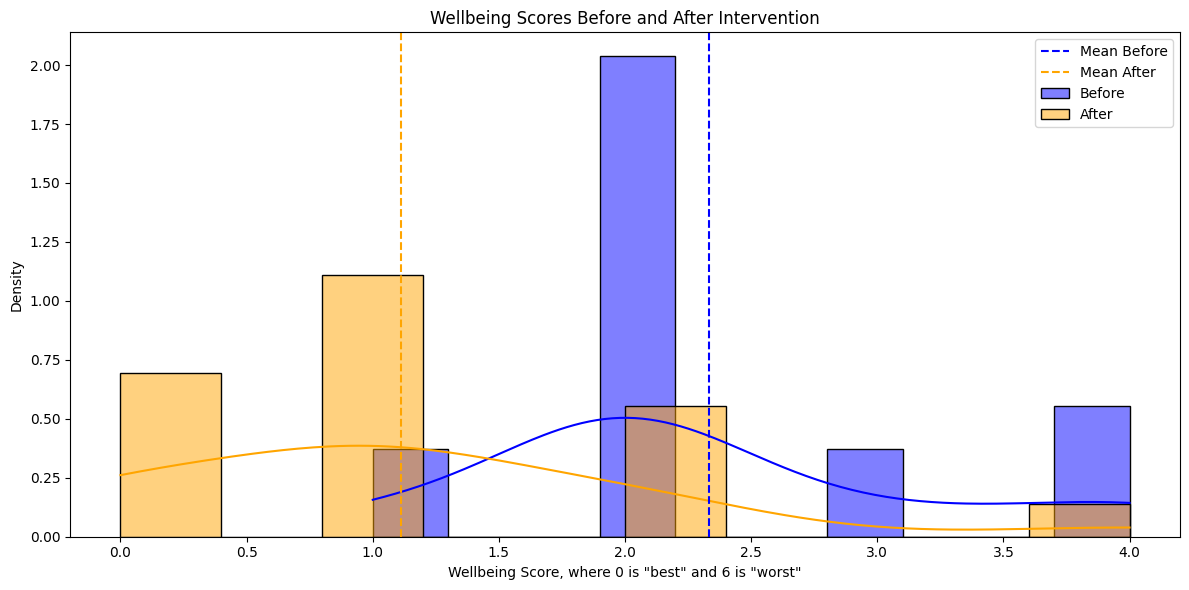

In [145]:
# Visualizing the distribution of wellbeing scores before and after the intervention
plt.figure(figsize=(12, 6))
sns.histplot(df_intervention['Before wellbeing score'], kde=True, color='blue', label='Before', stat='density', bins=10)
sns.histplot(df_intervention['After wellbeing score'], kde=True, color='orange', label='After', stat='density', bins=10)
plt.axvline(mean_before, color='blue', linestyle='--', label='Mean Before')
plt.axvline(mean_after, color='orange', linestyle='--', label='Mean After')
plt.title('Wellbeing Scores Before and After Intervention')
plt.xlabel('Wellbeing Score, where 0 is "best" and 6 is "worst"')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

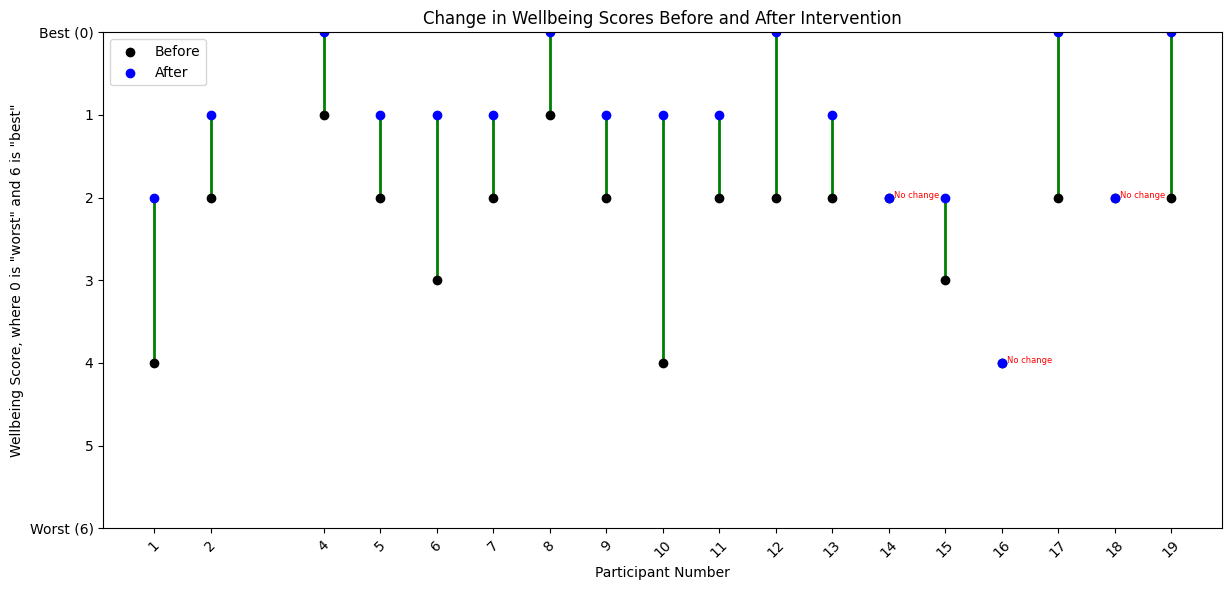

In [142]:
plt.figure(figsize=(12, 6))

# Plot colored lines based on improvement (green), decline (red), or no change (gray)
for idx, row in df_sorted.iterrows():
    change = row['After wellbeing score'] - row['Before wellbeing score']
    if change < 0:
        color = 'green'  # Score decreased = improvement
    elif change > 0:
        color = 'red'    # Score increased = decline
    else:
        color = 'gray'   # No change
    
    plt.plot(
        [idx] * 2,
        [row['Before wellbeing score'], row['After wellbeing score']],
        color=color, linewidth=2, zorder=1,
    )

# Add black dots for before and blue dots for after
plt.scatter(df_sorted.index, df_sorted['Before wellbeing score'], 
            color='black', zorder=2, label='Before')
plt.scatter(df_sorted.index, df_sorted['After wellbeing score'], 
            color='blue', zorder=2, label='After')

# Annotate participants with no change
for idx, row in df_sorted.iterrows():
    if row['Before wellbeing score'] == row['After wellbeing score']:
        plt.text(
            idx + 0.1,  # slightly offset on x-axis
            row['Before wellbeing score'],  # same y since no change
            'No change',
            fontsize=6,
            color='red'
        )

# Customize axes and labels
plt.ylabel('Wellbeing Score, where 0 is "worst" and 6 is "best"')
plt.xlabel('Participant Number')
plt.xticks(df_sorted.index.astype(int), rotation=45)
plt.title('Change in Wellbeing Scores Before and After Intervention')
plt.legend()
plt.tight_layout()
plt.ylim(bottom=0)  # Optional: start Y-axis at 0
plt.yticks([0, 1, 2, 3, 4, 5, 6], [
    'Best (0)', '1', '2', '3', '4', '5', 'Worst (6)'
])
plt.gca().invert_yaxis()
plt.show()



In [144]:
# Calculating the mean and standard deviation of the wellbeing scores
mean_before = df_intervention['Before wellbeing score'].mean()
mean_after = df_intervention['After wellbeing score'].mean()
std_before = df_intervention['Before wellbeing score'].std()
std_after = df_intervention['After wellbeing score'].std()
print(f"Mean Before: {mean_before:.2f}, Std Before: {std_before:.2f}")
print(f"Mean After: {mean_after:.2f}, Std After: {std_after:.2f}")
# Performing paired t-test
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(
    df_intervention['Before wellbeing score'], 
    df_intervention['After wellbeing score']
)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
# Interpreting the results
if p_value < 0.05:
    print("There is a statistically significant difference in wellbeing scores before and after the intervention.")
else:
    print("There is no statistically significant difference in wellbeing scores before and after the intervention.")

Mean Before: 2.33, Std Before: 0.91
Mean After: 1.11, Std After: 1.02
T-statistic: 6.41, P-value: 0.0000
There is a statistically significant difference in wellbeing scores before and after the intervention.


### Topic modelling 

In [147]:
print(len(df['importance_reason'].dropna()))
len(df['importance_reason'])

1252


1799

In [148]:
# Importing BERTopic for topic modeling
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
vectoriser_model = CountVectorizer(stop_words="english")

# Install wordcloud
%pip install wordcloud
from wordcloud import WordCloud



topic_model = BERTopic(vectorizer_model=vectoriser_model)
topics, probs = topic_model.fit_transform(df['importance_reason'].dropna().to_list())

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [61]:
topic_model.get_topic(0)  # Get the most frequent topic
      

[('health', np.float64(0.10156973205190012)),
 ('community', np.float64(0.07814820997345479)),
 ('mental', np.float64(0.07234515709463189)),
 ('feel', np.float64(0.06702533429507113)),
 ('great', np.float64(0.06217685993968854)),
 ('space', np.float64(0.059896441985384456)),
 ('people', np.float64(0.05945114209465833)),
 ('place', np.float64(0.054850599466098354)),
 ('good', np.float64(0.05225053584996045)),
 ('way', np.float64(0.05061722696024158))]

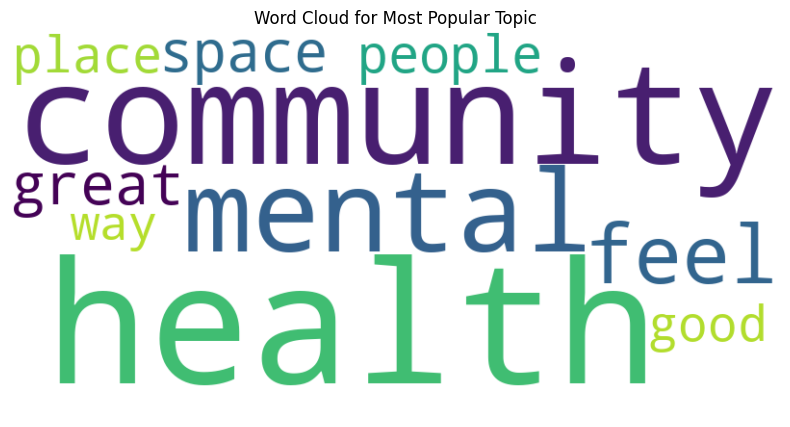

In [62]:
# Create a word cloud for the most popular topic
most_frequent_topic = topic_model.get_topic(0) # Change the number from 0-2 to view a different topic
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_frequent_topic))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Most Popular Topic")
plt.show()

In [63]:
topic_model.visualize_heatmap()

In [64]:
# Grouping importance_reason by age group
importance_by_age = df.groupby('gender')['importance_reason'].apply(lambda x: ' '.join(x.dropna())).reset_index()
importance_by_age




,gender,importance_reason
0,Female,"I love the sauna during winter, it helps with ..."
1,Male,An affordable way to help clear the stresses o...
2,Non-binary,Ability to relax with like minded people. Othe...
3,Other,"Good place to hang with sober friends, relax a..."
4,Prefer not to say,my mental health is better as well as my physi...
5,Transgender man,"It's such a wonderful time to go to a sauna, i..."


In [65]:
# Grouping topics by disability and health condition status
importance_by_disability = df.groupby('disability_health_condition')['importance_reason'].apply(lambda x: ' '.join(x.dropna())).reset_index()
importance_by_disability

,disability_health_condition,importance_reason
0,No,"I love the sauna during winter, it helps with ..."
1,Prefer not to say,So good for my mental health and as an LGBT wo...
2,Yes,Space to connect and unwind Very important for...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


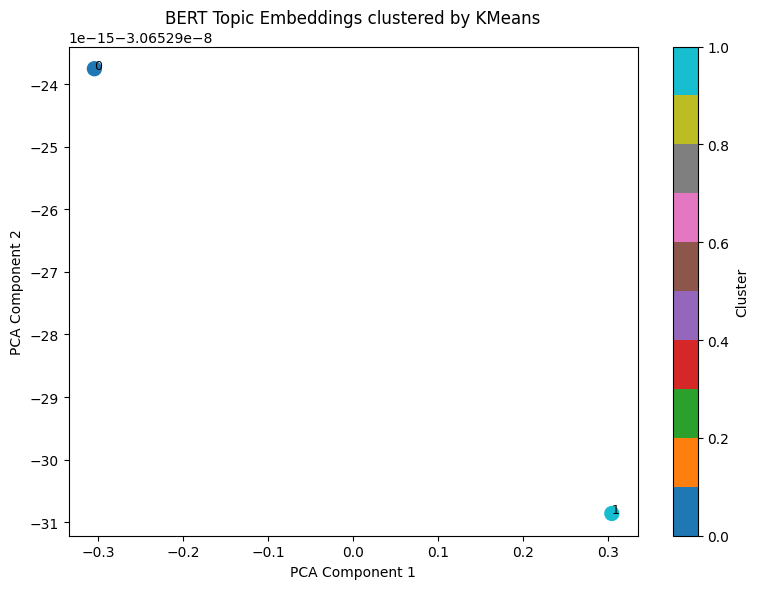

In [66]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# Get topic embeddings from BERTopic
topic_embeddings = topic_model.topic_embeddings_

# Remove outlier topic (-1) if present
valid_topics = [i for i in range(len(topic_embeddings)) if i != -1]
embeddings = np.array([topic_embeddings[i] for i in valid_topics])

# Cluster topics using KMeans (set k <= number of valid topics)
k = min(5, len(valid_topics))
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(embeddings)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='tab10', s=100)
for i, topic_num in enumerate(valid_topics):
    plt.annotate(str(topic_num), (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=9)
plt.title("BERT Topic Embeddings clustered by KMeans")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()